In [ ]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 86.3MB 67kB/s 
     |████████████████████████████████| 3.8MB 39.1MB/s 
     |████████████████████████████████| 450kB 51.2MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

from tensorflow.keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

# Train
#("this is good story",   1)
#("this was not good", 0)

#Testing
#("this is good story",   1) prediction 0
#("this was not good", 0)    prediction 0

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [28]:
i = 0
print('words: ', train_data[i])
print("len",len(train_data[i]))
print('label: ', train_labels[i])

words:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
len 218
label:  1


In [12]:
text = "my name is muhammad qasim i am pakistani, we love our country"

# Vectorization
unique_words = np.unique(list(text.split(" ")))
print(unique_words)
print(len(unique_words))

dictionary_words = list(enumerate(unique_words))

#"i am pakistani" = [2,0,9]  #len 3
#"we love our country" = [11,4,8,1] #len 4

#One-hot-encoding
#"i am pakistani"
#[1,0,1,0,0,0,0,0,0,1,0,0]

#"we love our country""
#[0,1,0,0,1,0,0,0,1,0,0,1]
dictionary_words
#   0     1        2   3    4      5         6     7      8      9           10      11
#['am' 'country' 'i' 'is' 'love' 'muhammad' 'my' 'name' 'our' 'pakistani,' 'qasim' 'we']

#[0,0,1,0,1,1,0,0,0,0,0,0]

"I love Muhammad"
#[0,0,1,0,0,0,0,0,0,0,0,0]
#[0,0,0,0,1,0,0,0,0,0,0,0]
#[0,0,0,0,0,1,0,0,0,0,0,0]

['am' 'country' 'i' 'is' 'love' 'muhammad' 'my' 'name' 'our' 'pakistani,'
 'qasim' 'we']
12


[(0, 'am'),
 (1, 'country'),
 (2, 'i'),
 (3, 'is'),
 (4, 'love'),
 (5, 'muhammad'),
 (6, 'my'),
 (7, 'name'),
 (8, 'our'),
 (9, 'pakistani,'),
 (10, 'qasim'),
 (11, 'we')]

In [ ]:
  A B C
A 1 0 0
B 0 1 0
C 0 0 1

In [16]:
import pprint
word_index = imdb.get_word_index()
pprint.pprint(word_index)

Streaming output truncated to the last 5000 lines.
 'vances': 45131,
 'vance¨': 72672,
 'vancleef': 49436,
 'vancouver': 12434,
 "vancouver's": 56434,
 'vancruysen': 72774,
 'vandalised': 84144,
 'vandalising': 81879,
 'vandalism': 34222,
 'vandalized': 37417,
 'vandalizes': 68251,
 'vandalizing': 87803,
 'vandals': 35551,
 'vandamme': 70824,
 'vandebrouck': 87220,
 'vandenberg': 55878,
 'vander': 50243,
 'vanderbeek': 71227,
 'vandermey': 68049,
 'vanderpark': 62879,
 'vanderpool': 82555,
 'vandervoort': 41283,
 'vandeuvres': 47710,
 'vandicholai': 66249,
 'vandross': 46982,
 'vandyke': 68647,
 'vane': 36725,
 'vanesa': 65536,
 'vanessa': 6036,
 "vanessa's": 37023,
 'vangard': 87421,
 'vangelis': 73765,
 'vanguard': 33132,
 'vanhook': 33632,
 'vani': 63951,
 'vanilla': 6739,
 'vanish': 15901,
 'vanished': 11917,
 'vanishes': 10548,
 'vanishing': 11908,
 "vanishing'": 29239,
 "vanishing's": 77112,
 'vanishings': 71816,
 'vanities': 15890,
 'vanity': 6883,
 'vanlint': 71469,
 "vanlint's

In [32]:
i = 5
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])
print(decoded_review)
print(train_labels[i])

? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br
0


In [27]:
print(" ".join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]))
print(train_labels[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [22]:
reverse_word_index.get(612,"?")

'seriously'

In [23]:
reverse_word_index.get(222222222,"?")

'?'

In [36]:
print(len([max(sequences) for sequences in train_data]))
print(max([max(sequences) for sequences in train_data]))
# 0 1,2....9999
# a,b,c....abcz

25000
9999


**Preparing Data Set**

In [37]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [39]:
train_data.shape

(25000,)

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [41]:
x_train.shape

(25000, 10000)

In [48]:
x_train[0].shape

(10000,)

In [49]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building Model

In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [51]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [52]:
x_val.shape

(10000, 10000)

In [53]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.5990 - acc: 0.7114 - val_loss: 0.4088 - val_acc: 0.8640
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3440 - acc: 0.9033 - val_loss: 0.3146 - val_acc: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2392 - acc: 0.9295 - val_loss: 0.3034 - val_acc: 0.8787
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1851 - acc: 0.9460 - val_loss: 0.2830 - val_acc: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1536 - acc: 0.9537 - val_loss: 0.2788 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1252 - acc: 0.9635 - val_loss: 0.2863 - val_acc: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1002 - acc: 0.9729 - val_loss: 0.3012 - val_acc: 0.8823
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0819 - a

In [54]:
history_dict = history.history
print(history_dict)

{'loss': [0.5298922657966614, 0.3250834047794342, 0.23553012311458588, 0.1843441277742386, 0.15399663150310516, 0.1255158632993698, 0.10658225417137146, 0.0857432633638382, 0.07193894684314728, 0.058286551386117935, 0.04532279446721077, 0.036851879209280014, 0.029792575165629387, 0.023464055731892586, 0.018869182094931602, 0.011637724004685879, 0.012700811959803104, 0.006282545160502195, 0.00733734667301178, 0.003598990850150585], 'acc': [0.7874000072479248, 0.903333306312561, 0.9266666769981384, 0.944266676902771, 0.9519333243370056, 0.962933361530304, 0.968999981880188, 0.9768000245094299, 0.9818666577339172, 0.9872666597366333, 0.9909999966621399, 0.9931333065032959, 0.9949333071708679, 0.9965999722480774, 0.996999979019165, 0.9992666840553284, 0.9976666569709778, 0.999666690826416, 0.9990666508674622, 0.999666690826416], 'val_loss': [0.408846378326416, 0.3145769536495209, 0.3034335672855377, 0.28299927711486816, 0.27883604168891907, 0.2863425612449646, 0.3011757433414459, 0.3237987

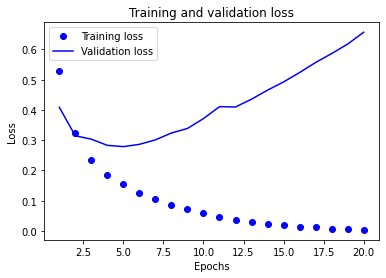

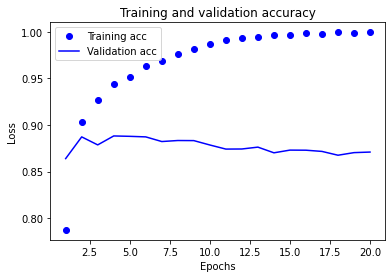

In [55]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
model.predict(x_test)

array([[0.01405698],
       [1.        ],
       [0.98149705],
       ...,
       [0.00492251],
       [0.02251983],
       [0.8123571 ]], dtype=float32)

In [57]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 45ms/step - loss: 0.0301 - acc: 0.9917 - val_loss: 0.6859 - val_acc: 0.8697
Epoch 2/4
30/30 [==============================] - 1s 35ms/step - loss: 0.0023 - acc: 0.9999 - val_loss: 0.7093 - val_acc: 0.8685
Epoch 3/4
30/30 [==============================] - 1s 35ms/step - loss: 0.0024 - acc: 0.9998 - val_loss: 0.7414 - val_acc: 0.8666
Epoch 4/4
30/30 [==============================] - 1s 34ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.7697 - val_acc: 0.8658


In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5442 - accuracy: 0.7225
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2660 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1949 - accuracy: 0.9341
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3022 - accuracy: 0.8809


In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5231 - accuracy: 0.7618
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2792 - accuracy: 0.9095
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2125 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2819 - accuracy: 0.8879


In [61]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.5228 - accuracy: 0.7387
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2365 - accuracy: 0.9158
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1819 - accuracy: 0.9364
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3211 - accuracy: 0.8776


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.1889 - accuracy: 0.7392
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0810 - accuracy: 0.9152
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0588 - accuracy: 0.9325
Epoch 4/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0486 - accuracy: 0.9439


In [2]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

NameError: ignored